<a href="https://colab.research.google.com/github/pratyushharsh/deepLearning/blob/master/Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

from sklearn.model_selection import KFold


In [49]:
# Loading the MNSIT dataset using tensorflow dataset

(trainX, trainy), (testX, testy) = mnist.load_data()

In [50]:
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


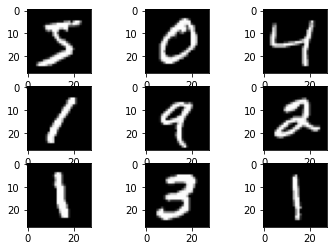

In [51]:
# Ploting few images
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

In [35]:
# Reshaping the dataset


In [52]:
def load_dataset():
  # Loading dataset from leras api
  (trainX, trainy), (testX, testy) = mnist.load_data()
  # reshaping to desired input size
  trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)
  testX = testX.reshape(testX.shape[0], 28, 28, 1)
  # One hot encoding
  trainy = tf.keras.utils.to_categorical(trainy)
  testy = tf.keras.utils.to_categorical(testy)
  return trainX, trainy, testX, testy

In [60]:
# Changing the pixel data from int9 to float32 for higher precession
def norm_pixels(train, test):
  # Convert to float32
  train_norm = train.astype('float32')
  test_norm = train.astype('float32')
  # Normalizing tp range 0 - 1
  train_norm = train_norm / 255
  test_norm = test_norm / 255
  # return normalized data
  return train_norm, test_norm

In [74]:
def define_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
  )
  return model;


In [78]:
# Model Evaluation
def evaluate_model(dataX, dataY, n_folds=5):
  scores, histories = list(), list()
  # prepare kfold validation
  kfold = KFold(n_folds, shuffle=True)
  for train_ix, test_ix in kfold.split(dataX):
    # defining the model
    model = define_model()
    # selecting row for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    # fit the model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY))
    # model evaluation
    _, acc = model.evaluate(testX, testY)
    print('> %.3f' % (acc*100.0))
    scores.append(acc)
    histories.append(history)
  
  return scores, histories

In [85]:
# Ploting diagonostic curvrs
def summary_diagnostic(history):
  for i in range(len(history)):
    # plotting loss
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(history[i].history['loss'], color='blue', label='train')
    plt.plot(history[i].history['val_loss'], color='orange', label='test')
    # plotting accuracy
    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(history[i].history['accuracy'], color='blue', label='train')
    plt.plot(history[i].history['val_accuracy'], color='orange', label='test')
  plt.show()


In [88]:
# Summuraizing Performance
def summary_performance(scores):
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))


In [79]:
# Test to evaluate the model
def run_test_harness():
  # Loading dataset
  trainX, trainY, testX, testY = load_dataset()
  # prepare the data
  trainX, testX = norm_pixels(trainX, testX)
  # evaluating model
  scores, histories = evaluate_model(trainX, trainY)
  # learning curves
  summary_diagnostic(histories)
	# summarize estimated performance
  summary_performance(scores)


In [81]:
trainX, trainY, testX, testY = load_dataset()

In [82]:
trainX, testX = norm_pixels(trainX, testX)

In [83]:
scores, histories = evaluate_model(trainX, trainY)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1820 - accuracy: 0.9465 - val_loss: 0.0672 - val_accuracy: 0.9814
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0580 - accuracy: 0.9823 - val_loss: 0.0485 - val_accuracy: 0.9860
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0371 - accuracy: 0.9883 - val_loss: 0.0445 - val_accuracy: 0.9866
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0257 - accuracy: 0.9916 - val_loss: 0.0421 - val_accuracy: 0.9887
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.0463 - val_accuracy: 0.9868
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.0446 - val_accuracy: 0.9871
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0537 - val_accuracy:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


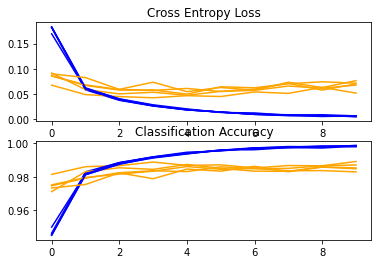

In [86]:
summary_diagnostic(histories)

In [89]:
summary_performance(scores)

Accuracy: mean=98.580 std=0.209, n=5
